# Clean and data preparation.

First import pandas and manage the data.


label: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

In [4]:
import pandas as pd

data = pd.read_csv('./text.csv')

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


With the result we clean the data, deleting duplicate data and null data if exists.

In [5]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

Delete the column of index named 'Unnamed: 0', is important set the name of the column and no the index, because this could delete all data if execute this command repeatedly.
- Rename Heads

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

In [13]:
data = data.rename(columns={'text':'Text','label':'Label'})

Map labels to easy-understable words

In [14]:
label_map = {
    0:'sadness',
    1:'joy',
    2:'love',
    3:'anger',
    4:'fear',
    5:'surprise'
}
data['Label_String'] = data['Label'].map(label_map)
data.head()

,Text,Label,Label_String
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


Calculate string length of text column, strip extra whitespaces and set lowercase the content of Text column.

In [15]:
data['Text_Length'] = data['Text'].str.len()
data['Text'] = data['Text'].str.lower()
data['Text'] = data['Text'].str.strip()
data.head()

,Text,Label,Label_String,Text_Length
0,i just feel really helpless and heavy hearted,4,fear,45
1,ive enjoyed being able to slouch about relax a...,0,sadness,234
2,i gave up my internship with the dmrg and am f...,4,fear,63
3,i dont know i feel so lost,0,sadness,26
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222


Intalling package to next task. Emoji library

In [16]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 5.8 MB/s eta 0:00:00


Remove HTML tags, puntuation, emojis and urls.

In [17]:
#remove html
import re
import string
import emoji
from bs4 import BeautifulSoup

punctuation = string.punctuation

def remove_urls(text):
    return re.sub(r'http\S+|www\S+','',text)

def remove_html_tags(text):
    soup=BeautifulSoup(text,'html.parser')
    return soup.get_text()

def remove_punctuation(text):
    return text.translate(str.maketrans('','',punctuation))

def remove_emojis(text):
    return emoji.demojize(text)

data['Text'] = data['Text'].apply(remove_html_tags)
data['Text'] = data['Text'].apply(remove_urls)
data['Text'] = data['Text'].apply(remove_punctuation)
data['Text'] = data['Text'].apply(remove_emojis)
data.head()



,Text,Label,Label_String,Text_Length
0,i just feel really helpless and heavy hearted,4,fear,45
1,ive enjoyed being able to slouch about relax a...,0,sadness,234
2,i gave up my internship with the dmrg and am f...,4,fear,63
3,i dont know i feel so lost,0,sadness,26
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222


Retrieve json file with abbrevations handing and applying in data.

In [21]:
#Importing json
chat_words  = pd.read_json('./abbreviations.json', orient='index')

def replace_chat_words(text):
    words=text.split()
    for i, word in enumerate(words):

        if word.upper() in chat_words:
            words[i] = chat_words[word.upper()].lower()
    return ' '.join(words)

data['Text'] = data['Text'].apply(replace_chat_words)
data.head()



,Text,Label,Label_String,Text_Length
0,i just feel really helpless and heavy hearted,4,fear,45
1,ive enjoyed being able to slouch about relax a...,0,sadness,234
2,i gave up my internship with the dmrg and am f...,4,fear,63
3,i dont know i feel so lost,0,sadness,26
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222


Deleting stop words. These words are very common and don't have a significant meaning.

In [23]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words=text.split()
    filtered_words=[word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

data['Text'] = data['Text'].apply(remove_stopwords)
data.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Label,Label_String,Text_Length
0,feel really helpless heavy hearted,4,fear,45
1,ive enjoyed able slouch relax unwind frankly n...,0,sadness,234
2,gave internship dmrg feeling distraught,4,fear,63
3,dont know feel lost,0,sadness,26
4,kindergarten teacher thoroughly weary job take...,4,fear,222


Stemming words, is for group variants of the same word to be treated as a single element (running as run). It reduces the complexity of the language and minimizes the number of variants the system needs to handle.

In [24]:
from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()
data['Text_Stemmed'] = data['Text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

data.head()

,Text,Label,Label_String,Text_Length,Text_Stemmed
0,feel really helpless heavy hearted,4,fear,45,feel realli helpless heavi heart
1,ive enjoyed able slouch relax unwind frankly n...,0,sadness,234,ive enjoy abl slouch relax unwind frankli need...
2,gave internship dmrg feeling distraught,4,fear,63,gave internship dmrg feel distraught
3,dont know feel lost,0,sadness,26,dont know feel lost
4,kindergarten teacher thoroughly weary job take...,4,fear,222,kindergarten teacher thoroughli weari job take...


Analyze data a visualization: Bar diagram and heat map

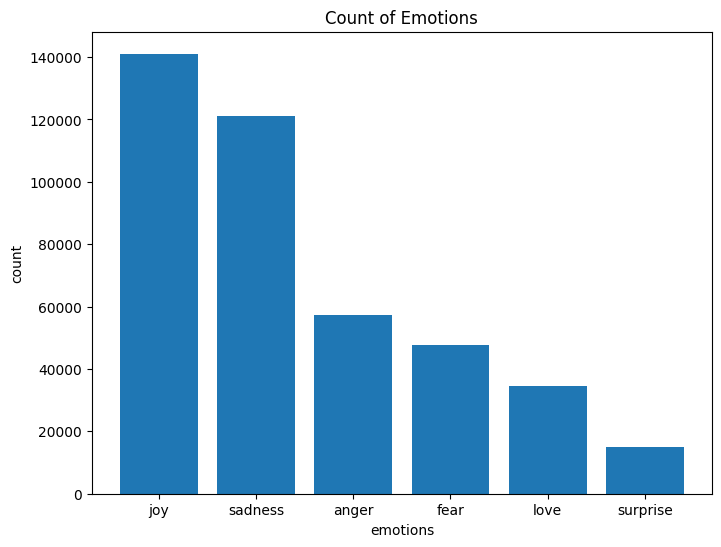

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

label_counts = data['Label_String'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(label_counts.index,label_counts.values)

plt.xlabel('emotions')
plt.ylabel('count')
plt.title('Count of Emotions')
plt.show()

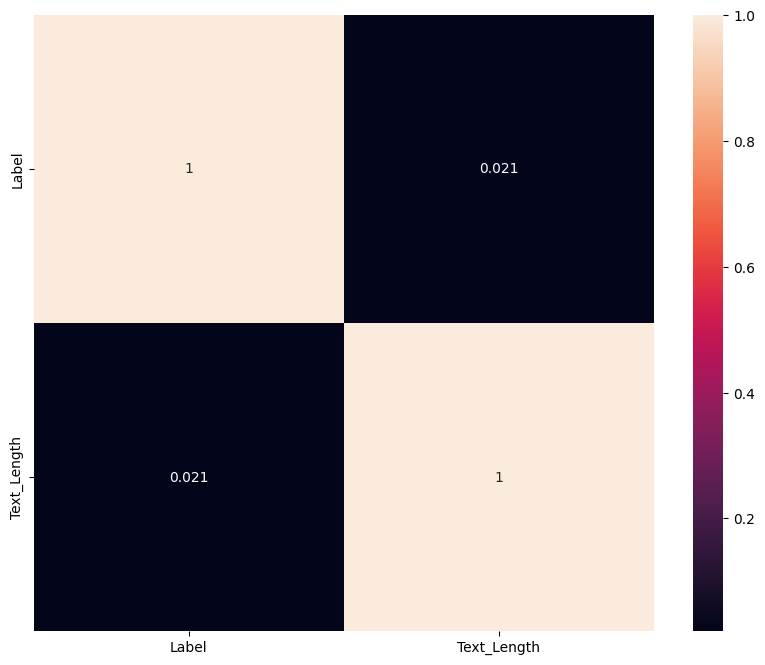

In [26]:
# relationship between emotion and text length
new_data = data[['Label','Text_Length']]
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(),annot=True)
plt.show()

In [27]:
# Word cloud
# feature extraction, bag of words
for label in data['Label_String'].unique():
    filtered_data = data[data['Label_String']==label]
    text = ' '.join(filtered_data['Text_Stemmed'])

    wordcloud = WordCloud(width=600,height=300,background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f'Word Cloud for Label: {label}')
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Correlation between emotions

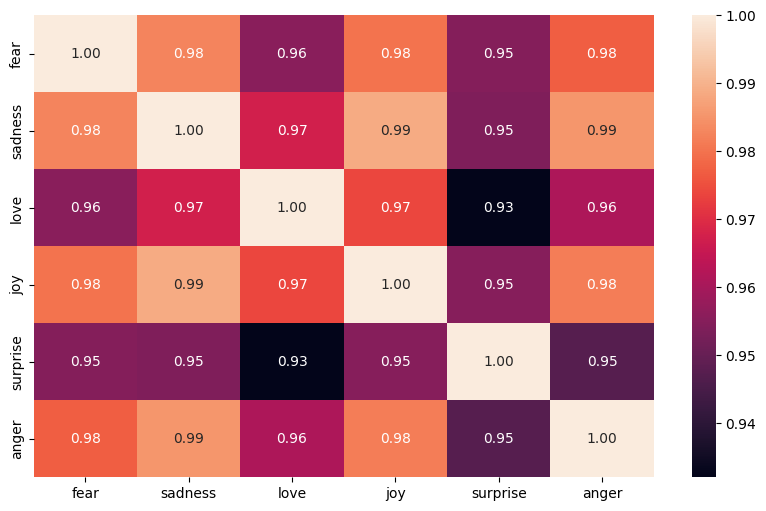

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
emotions = data['Label_String'].unique()
word_counts_per_emotion = {}

for emotion in emotions:
    # create a vector DataFrame for each emotion
    sub_data = data[data['Label_String'] == emotion]

    # use CountVectorizer calculating word frenquency
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(sub_data['Text_Stemmed'])

    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_counts_per_emotion[emotion] = word_counts.sum().sort_values(ascending=False)

# Combine word counts for all emotions into one DataFrame
all_word_counts = pd.concat(word_counts_per_emotion, axis=1)

# visualize the collaboration matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(all_word_counts.corr(), annot=True, fmt=".2f")
plt.show()

With this first step we need to save the clened data and prepare it to the next step.

In [31]:
data.to_csv('./cleaned_data.csv', index=False)

data_cleaned = pd.read_csv('./cleaned_data.csv')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          416793 non-null  object
 1   Label         416809 non-null  int64 
 2   Label_String  416809 non-null  object
 3   Text_Length   416809 non-null  int64 
 4   Text_Stemmed  416793 non-null  object
dtypes: int64(2), object(3)
memory usage: 15.9+ MB


In [32]:
# Check data.
data_cleaned.head()

,Text,Label,Label_String,Text_Length,Text_Stemmed
0,feel really helpless heavy hearted,4,fear,45,feel realli helpless heavi heart
1,ive enjoyed able slouch relax unwind frankly n...,0,sadness,234,ive enjoy abl slouch relax unwind frankli need...
2,gave internship dmrg feeling distraught,4,fear,63,gave internship dmrg feel distraught
3,dont know feel lost,0,sadness,26,dont know feel lost
4,kindergarten teacher thoroughly weary job take...,4,fear,222,kindergarten teacher thoroughli weari job take...


#  Split data and preparation for train

The data is split in a proportion 20/80 test/train.

In [33]:
from sklearn.model_selection import train_test_split

X = data_cleaned['Text_Stemmed']
y = data_cleaned['Label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

Save data splited and ~save data vectorized for the independient variables (text stemmed).~ The data is not vectorized because the BERT implementation that will be used is not yet known.

#### **Why save this?**
- Facilitates collaboration: Allows others to work with the exact same data without having to repeat preprocessing steps.
- Saves time: It is useful if the vectorization process takes a long time or if you prefer to perform the division and vectorization in a different environment (or time) than training the model.
- Reproducibility: Ensures that you can retrain models or test new models in the future with exactly the same training and testing data.

`joblib.load` will bring back sparse arrays.

In [34]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

# Save set of data X
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')

# Save set of label y
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')


['y_test.pkl']

The next steps is tokenizer and vectorizer with BERT.